In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [35]:
M=np.load('maze.npy')
M.shape

(100, 100)

Text(0.5, 1.0, 'M')

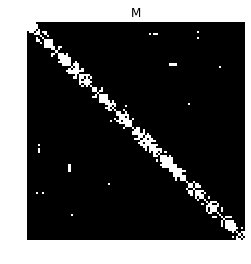

In [3]:
plt.imshow(M,cmap='gray')
plt.axis('off')
plt.title('M')

In [63]:
trans=M.copy()
trans[np.arange(len(M)),np.arange(len(M))]=np.zeros(len(M))
#trans=np.divide(trans, np.count_nonzero(trans,axis=0), out=np.zeros_like(trans), where=M.sum(1)!=0)
trans=trans[None,:]/np.count_nonzero(trans,axis=0).reshape(-1,1)
trans[trans!=trans]=0
trans=trans[0]

C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


279 µs ± 830 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [62]:
k=1
trans_k=trans
while trans_k[0,99]==0:
    trans_k=np.matmul(trans_k,trans)
    k+=1
print(k)

13


In [70]:
trans@trans==np.linalg.matrix_power(trans,2)

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [121]:
def search_door(i,j,p):
    if p==-1:
        return
    A=np.linalg.matrix_power(trans,p)
    C=A@trans
    if C[i,j]!=0:
        nnz=[]
        for k in range(len(trans)):
            if A[i,k]!=0 and trans[k,j]!=0:
                nnz.append(k)
        try:
            hist[p].extend(nnz)
        except KeyError:
            hist[p]=nnz
        if len(nnz)>1:
            print(p,'multiple doors',nnz)
        elif len(nnz)==0:
            hist[p+1].remove(j)
            print('remove',j)
        for d in nnz:
            search_door(i,d,p-1)
    else:
        print(p,'impossible')
        return None

In [122]:
i,j=0,99
hist={}
search_door(i,j,12)
for k in hist:
    hist[k]=np.unique(hist[k])
#for p in range(12,0,-1):
#    sear

10 multiple doors [91, 92, 93]
8 multiple doors [85, 86]
4 multiple doors [77, 79]
1 multiple doors [1, 2]
1 multiple doors [1, 2]
4 multiple doors [77, 79]
1 multiple doors [1, 2]
1 multiple doors [1, 2]
8 multiple doors [85, 86]
4 multiple doors [77, 79]
1 multiple doors [1, 2]
1 multiple doors [1, 2]
4 multiple doors [77, 79]
1 multiple doors [1, 2]
1 multiple doors [1, 2]
8 multiple doors [85, 86]
4 multiple doors [77, 79]
1 multiple doors [1, 2]
1 multiple doors [1, 2]
4 multiple doors [77, 79]
1 multiple doors [1, 2]
1 multiple doors [1, 2]


In [123]:
hist

{12: array([96]),
 11: array([94]),
 10: array([91, 92, 93]),
 9: array([89]),
 8: array([85, 86]),
 7: array([84]),
 6: array([83]),
 5: array([80]),
 4: array([77, 79]),
 3: array([78]),
 2: array([4]),
 1: array([1, 2]),
 0: array([0])}

In [114]:
hist.keys

TypeError: 'builtin_function_or_method' object is not subscriptable

In [14]:
curr_room=0
rooms_checked=[0]
while curr_room!=99:
    #go always furthest 
    curr_room=np.argmax(M[curr_room]*np.arange(len(M)))
    if curr_room in rooms_checked:
        print('failure')
        break
    rooms_checked.append(curr_room)
    

failure


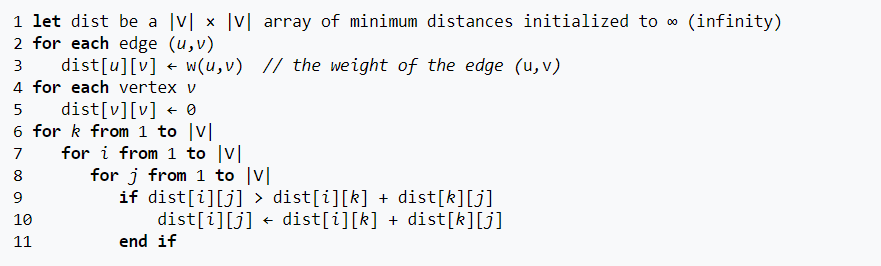
Source: https://en.wikipedia.org/wiki/Floyd%E2%80%93Warshall_algorithm

In [23]:
dist = M.copy()
dist[dist==0]=np.inf
V=len(M)
dist[np.arange(V),np.arange(V)] = np.zeros(len(M))
for k in range(V):
    for i in range(V):
        for j in range(V):
            if dist[i,j]>dist[i,k]+dist[k,j]:
                dist[i,j]=dist[i,k]+dist[k,j]

In [28]:
def shortest(i,j):
    dist = M.copy()
    dist[dist==0]=np.inf
    V=len(M)
    doors=[]
    dist[np.arange(V),np.arange(V)] = np.zeros(len(M))
    for k in range(V):
        if dist[i,j]>dist[i,k]+dist[k,j]:
            doors.append(k)
            dist[i,j]=dist[i,k]+dist[k,j]
    return doors

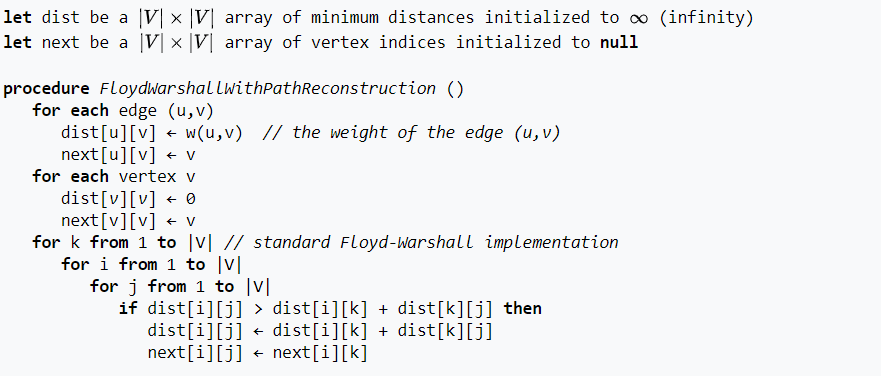

In [35]:
def FloydWarshallWithPathReconstruction():
    V=len(M)
    dist = M.copy()
    dist[dist==0]=np.inf
    dist[np.arange(V),np.arange(V)] = np.zeros(len(M))
    next = np.inf*np.ones(M.shape)
    next[np.where(M==1)]=np.where(M==1)[1]
    next[np.arange(V),np.arange(V)]=np.arange(V)
    for k in range(V):
        for i in range(V):
            for j in range(V):
                if dist[i,j]>dist[i,k]+dist[k,j]:
                    dist[i,j]=dist[i,k]+dist[k,j]
                    next[i,j]=next[i,k]
    return dist,next

In [36]:
d,n=FloydWarshallWithPathReconstruction()

In [37]:
n

array([[ 0.,  1.,  2., ...,  1.,  1.,  1.],
       [ 0.,  1.,  2., ...,  4.,  4.,  4.],
       [ 0.,  1.,  2., ...,  4.,  4.,  4.],
       ...,
       [99., 99., 99., ..., 97., 99., 99.],
       [94., 94., 94., ..., 96., 98., 96.],
       [96., 96., 96., ..., 97., 96., 99.]])

(-0.5, 99.5, 99.5, -0.5)

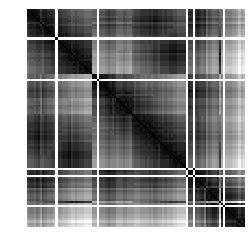

In [26]:
plt.imshow(dist,cmap='gray')
plt.axis('off')


how much does it cost from 0 to 99?

In [27]:
dist[0,99]

13.0

$\rightarrow$ 13 doors